In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import pickle
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
df = pd.DataFrame(cancer.data ,columns =cancer.feature_names)
print(df.shape)
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
#scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
import seaborn as sns
sns.pairplot(df,diag_kind = "kde")

In [ ]:
# kmeans clustering  in an iteration 1 till 20 cluster size
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

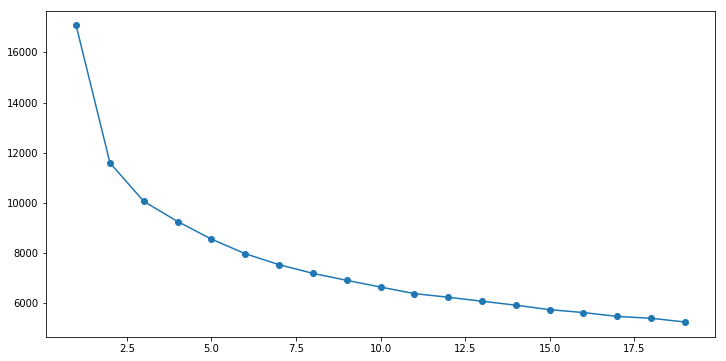

In [10]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2,random_state=100).fit(X_scaled)
kmeans

#centroids and labels

centroids = kmeans.cluster_centers_
print(centroids)

print('\n')

label = kmeans.labels_
print(label)

[[ 0.93362406  0.4620646   0.96730462  0.92424266  0.60116657  1.01678879
   1.11927003  1.13499581  0.59745592  0.28828783  0.82729086  0.0408053
   0.83306382  0.77658149  0.0460656   0.71559384  0.64677371  0.76877382
   0.14483925  0.45777508  1.00100618  0.48610441  1.02895252  0.96525332
   0.61097579  0.95149718  1.0377126   1.12132923  0.58638203  0.65089347]
 [-0.48299485 -0.23904142 -0.50041892 -0.47814154 -0.3110035  -0.52601873
  -0.57903569 -0.58717117 -0.30908386 -0.1491409  -0.42798514 -0.02110994
  -0.43097168 -0.40175149 -0.02383127 -0.37020054 -0.3345976  -0.39771232
  -0.07493017 -0.23682231 -0.51785387 -0.25147802 -0.53231144 -0.49935772
  -0.31607814 -0.49224121 -0.53684332 -0.58010099 -0.30335497 -0.33672889]]


[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 

In [12]:
new_df = pd.concat([df,pd.Series(label,name = "Target")],axis =1)
new_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
#importing libraries for logistic regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Logistics Regression
from sklearn.metrics import accuracy_score, confusion_matrix # Evaluation for Model

In [14]:
X = new_df.drop(['Target'],axis =1)
y = new_df.Target

In [15]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [17]:

#Model Building
lg = LogisticRegression()
model = lg.fit(X,y)
model

#find predictions
predictions = lg.predict(X)

#accuracy score for evaluation
print("accuracy score is ",accuracy_score(predictions,y))

accuracy score is  0.9736379613356766


C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
#finding confusion matrix
cf = confusion_matrix(y, predictions)
cf

array([[184,  10],
       [  5, 370]], dtype=int64)

In [19]:
#Classification_report

from sklearn.metrics import classification_report
class_report = classification_report(y,predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       194
           1       0.97      0.99      0.98       375

   micro avg       0.97      0.97      0.97       569
   macro avg       0.97      0.97      0.97       569
weighted avg       0.97      0.97      0.97       569



In [20]:
#Data plit into Train and Test :

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 100)

print("x_train shape is ",x_train.shape)
print("x_test shape is ",x_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

x_train shape is  (455, 30)
x_test shape is  (114, 30)
y_train shape is  (455,)
y_test shape is  (114,)


In [21]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# For evaluating our ML results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc

# Dataset Import
import statsmodels.api as sm

In [46]:
# Packages
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# For evaluating our ML results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc

# Dataset Import
import statsmodels.api as sm

# Logistic Regression

In [23]:

#Model Building
lg = LogisticRegression()
model_1 = lg.fit(x_train,y_train)
model_1

#find predictions
predictions_1 = lg.predict(x_test)

#accuracy score for evaluation
#print("accuracy score is ",accuracy_score(y_test,predictions_1))

lg_score_train = lg.score(x_train,y_train)
print("Train Prediction Score",lg_score_train*100)
lg_score_test = accuracy_score(y_test,predictions_1)
print("Test Prediction Score",lg_score_test*100)

#finding confusion matrix
cf1 = confusion_matrix(y_test, predictions_1)
cf1



Train Prediction Score 96.92307692307692
Test Prediction Score 96.49122807017544


C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[43,  2],
       [ 2, 67]], dtype=int64)

In [24]:
#KFOlD cross validation

from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True ,random_state = 100)
acc = []
for train,test in kf.split(X,y):
    M = LogisticRegression()
    Xtrain,Xtest = x_train,x_test
    Ytrain,Ytest = y_train,y_test
    M.fit(Xtrain,Ytrain)
    Y_predict = M.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
print("Cross validation score : %.3f%% " %np.mean(acc))

Cross validation score : 0.965% 


C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

# SVM

In [25]:
svc = SVC(kernel = 'linear',random_state = 100,probability=True)
svc.fit(x_train,y_train)

y_pred_svc= svc.predict(x_test)

svc_score_train = svc.score(x_train,y_train)
print("Train Prediction Score",svc_score_train*100)
svc_score_test = accuracy_score(y_test,y_pred_svc)
print("Test Prediction Score",svc_score_test*100)

#finding confusion matrix
cf1 = confusion_matrix(y_test,y_pred_svc)
cf1

Train Prediction Score 98.02197802197801
Test Prediction Score 99.12280701754386


array([[44,  1],
       [ 0, 69]], dtype=int64)

# Decision Tree

## GINI

In [26]:
# GridSearchCV

param_grid={'max_depth':range(1,15,2) ,
            'max_features':range(1,15,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(x_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 13}
Accuracy : 0.9626373626373627


C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
# Fitting Logistic Regression to the Training set
dt = DecisionTreeClassifier(max_depth=5,max_features=13,random_state = 100)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [28]:

y_pred_dt= dt.predict(x_test)

#Score of Prediction
dt_score_train = dt.score(x_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

#finding confusion matrix
cf2 = confusion_matrix(y_test,y_pred_dt)
cf2

Train Prediction Score 99.78021978021978
Test Prediction Score 95.6140350877193


array([[43,  2],
       [ 3, 66]], dtype=int64)

## Entropy

In [29]:
# GridSearchCV

param_grid={'max_depth':range(1,15,2) ,
            'max_features':range(1,15,2)}
dt_g=DecisionTreeClassifier(criterion='entropy',random_state = 100)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(x_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 13}
Accuracy : 0.9582417582417583


C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
# Fitting Logistic Regression to the Training set
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=13,random_state = 100)
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [31]:
y_pred_dt= dt.predict(x_test)

#Score of Prediction
dt_score_train = dt.score(x_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

#finding confusion matrix
cf2 = confusion_matrix(y_test,y_pred_dt)
cf2

Train Prediction Score 99.12087912087912
Test Prediction Score 99.12280701754386


array([[44,  1],
       [ 0, 69]], dtype=int64)

# Random forest

In [32]:
# GridSearchCV
param_grid={'max_depth':range(1,15,2),
            'n_estimators':[125,250],
            'max_features':range(1,15,2)}
dt_g=RandomForestClassifier(random_state=100)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(x_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 3, 'n_estimators': 250}
Accuracy : 0.9868131868131869


C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
rf = RandomForestClassifier(max_depth=5,max_features=3,n_estimators=250,random_state=100)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [34]:
y_pred_rf= dt.predict(x_test)

In [35]:
#Score of Prediction
rf_score_train = rf.score(x_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.12280701754386


In [36]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_rf)

array([[44,  1],
       [ 0, 69]], dtype=int64)

# Naive bayes

In [37]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
y_pred_nb= nb.predict(x_test)

In [39]:
nb_score_train = nb.score(x_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 97.36263736263736
Test Prediction Score 98.24561403508771


In [40]:
confusion_matrix(y_test, y_pred_nb)

array([[44,  1],
       [ 1, 68]], dtype=int64)

# KNN

In [41]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
y_pred_knn= knn.predict(x_test)

In [43]:
knn_score_train = knn.score(x_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction Score",knn_score_test*100)

Train Prediction Score 92.3076923076923
Test Prediction Score 85.96491228070175


In [44]:
confusion_matrix(y_test, y_pred_knn)

array([[37,  8],
       [ 8, 61]], dtype=int64)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [51]:
classifiers = [ 
    LogisticRegression(),
    DecisionTreeClassifier(criterion='gini'),
    DecisionTreeClassifier(criterion='entropy'),
    DecisionTreeRegressor(),
    SVC(kernel="rbf",probability=True),
    SVC(kernel='linear',probability=True),
    SVC(kernel='poly',probability=True), 
    SVC(kernel='sigmoid',probability=True),
    GaussianNB(),
    BernoulliNB(),
    KNeighborsClassifier(12),
    KMeans(n_clusters=6,init='random',algorithm='full' ,random_state=0),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    #XGBClassifier(), 
]
    
""" Logging for visual comparison. """ 

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

""" Iterate through each classification model stated above, fitting the model to the train data and finally
    printing the accuracy and log loss of each model. """

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegression
****Results****
Accuracy: 96.4912%
Log Loss: 1.2119009190745897
DecisionTreeClassifier
****Results****
Accuracy: 97.3684%
Log Loss: 0.9089221822996696
DecisionTreeClassifier
****Results****
Accuracy: 96.4912%
Log Loss: 1.2119009190745895
DecisionTreeRegressor
****Results****
Accuracy: 96.4912%
Log Loss: 1.2118939050620439
SVC
****Results****
Accuracy: 60.5263%
Log Loss: 13.634043154871398
SVC
****Results****
Accuracy: 99.1228%
Log Loss: 0.30297873677492093


C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
****Results****
Accuracy: 97.3684%
Log Loss: 0.9089221822996698
SVC
****Results****
Accuracy: 60.5263%
Log Loss: 13.634043154871398
GaussianNB
****Results****
Accuracy: 98.2456%
Log Loss: 0.6059504595372953
BernoulliNB
****Results****
Accuracy: 60.5263%
Log Loss: 13.634043154871398
KNeighborsClassifier
****Results****
Accuracy: 89.4737%
Log Loss: 3.635695743211221

C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



KMeans
****Results****
Accuracy: 28.9474%
Log Loss: 15.148831628557815
RandomForestClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 9.992007221626413e-16
AdaBoostClassifier
****Results****
Accuracy: 98.2456%
Log Loss: 0.6059574735498409


C:\Users\BARANIDHARAN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier
****Results****
Accuracy: 99.1228%
Log Loss: 0.30297873677492093
MLPClassifier
****Results****
Accuracy: 92.1053%
Log Loss: 2.726766546899007
